创建一张图片，用作背景

In [237]:
from PIL import Image
import random

In [76]:
width, height = 120, 60

In [77]:
image = Image.new('RGB', (width, height), "#3e7cd7")

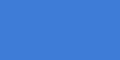

In [78]:
image

创建ImageFont

In [79]:
from PIL.ImageFont import truetype

In [80]:
monaco = truetype('./data/Monaco.ttf', size=28)

创建一个字符的图片

In [349]:
from PIL.ImageDraw import Draw

In [350]:
draw = Draw(image)

In [351]:
p1, p2, p3, p4 = draw.textbbox((0, 0), "A", font=monaco)

In [352]:
p1, p2, p3, p4

(0, 7, 17, 28)

获取文字的宽高

In [353]:
w, h = p3 - p1, p4 - p2

In [354]:
w, h

(17, 21)

In [355]:
dx = random.randint(0, 6)
dy = random.randint(0, 6)

In [356]:
text_img = Image.new('RGBA', (w + 2*dx, h + 2*dy), "#3e7cd7")

In [357]:
text_img

In [358]:
Draw(text_img).text((dx, dy), "A", font=monaco, fill="white", anchor='lt')

In [359]:
text_img

旋转文字图片

In [360]:
# 从图片获取一个矩形区域，这一步貌似不需要
rotated_text_img = text_img.crop(text_img.getbbox())

In [361]:
rotated_text_img

In [362]:
rotated_text_img = rotated_text_img.rotate(15, Image.BILINEAR, expand=True)

In [363]:
rotated_text_img

In [364]:
rotated_text_img.getbbox()

(0, 0, 27, 37)

扭曲图片，对文字进行模糊处理

In [365]:
dx = w * random.uniform(0.4, 0.9)
dy = h * random.uniform(0.4, 0.9)
x1 = int(random.uniform(-dx, dx))
y1 = int(random.uniform(-dy, dy))
x2 = int(random.uniform(-dx, dx))
y2 = int(random.uniform(-dy, dy))
w2 = w + abs(x1) + abs(x2)
h2 = h + abs(y1) + abs(y2)
data = (
    x1, y1,
    -x1, h2 - y2,
    w2 + x2, h2 + y2,
    w2 - x2, -y1,
)

In [366]:
data

(3, 0, -3, 21, 20, 41, 30, 0)

In [367]:
w, h

(17, 21)

In [368]:
w2, h2

(25, 31)

In [369]:
rotated_text_img = rotated_text_img.resize((w2, h2))

In [370]:
rotated_text_img

In [371]:
rotated_text_img = rotated_text_img.transform((w2, h2), Image.QUAD, data)

In [372]:
rotated_text_img

In [234]:
from image import ImageCaptcha

In [235]:
ic = ImageCaptcha()

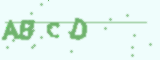

In [236]:
ic.generate_image("ABCD")

In [232]:
from importlib import reload
import sys

In [233]:
reload(sys.modules["image"])

<module 'image' from 'D:\\projects\\开发项目\\projects\\basic-fastapi\\backend\\captcha\\image.py'>